<a href="https://colab.research.google.com/github/sharma-nav1729/IIP_Data_Forecasting/blob/main/notebooks/exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IIP_Data.csv to IIP_Data.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['IIP_Data.csv']), parse_dates=['Month'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

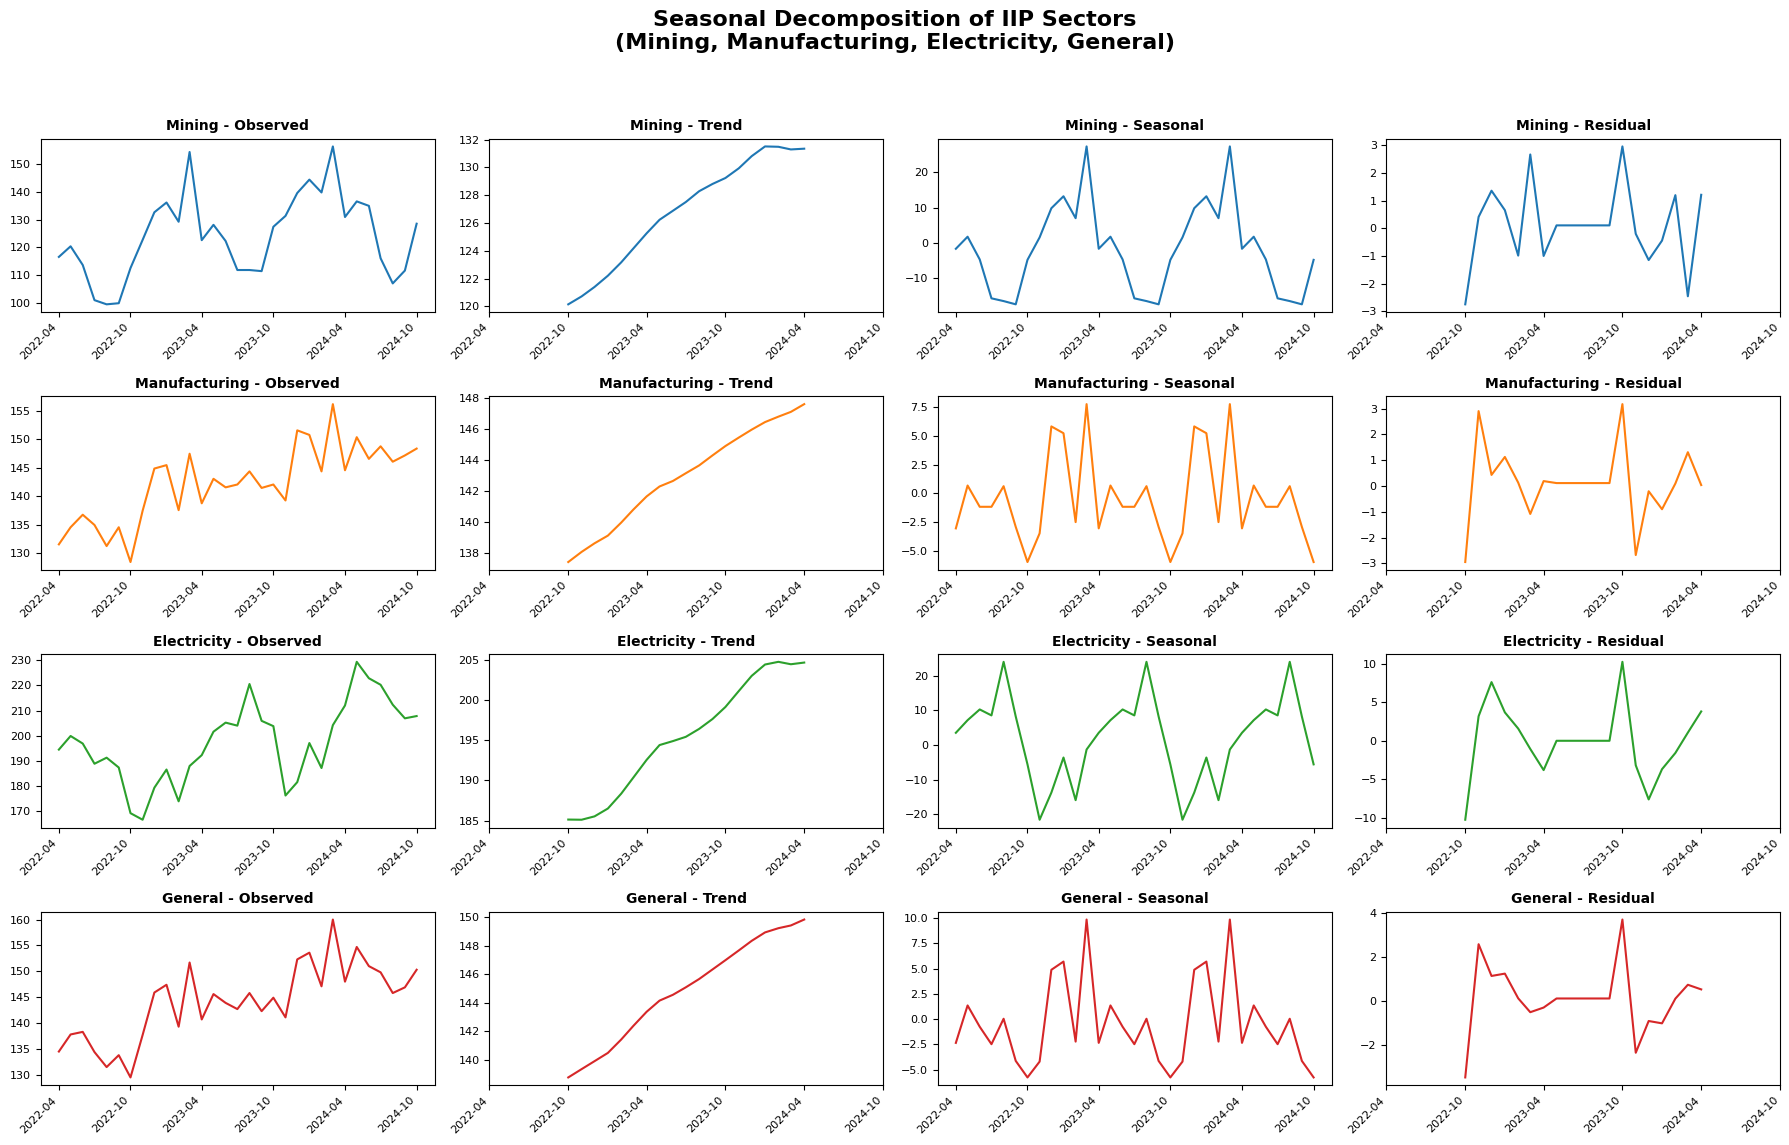

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

# Load and prepare the data
df = pd.read_csv("IIP_Data.csv", parse_dates=['Month'])
df.set_index('Month', inplace=True)
df = df.asfreq('MS')

# Sector colors
sectors = {
    'Mining': 'tab:blue',
    'Manufacturing': 'tab:orange',
    'Electricity': 'tab:green',
    'General': 'tab:red'
}

# Generate 6-month interval ticks
tick_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='6MS')
tick_labels = tick_dates.strftime('%Y-%m')

# Create the plot
fig, axes = plt.subplots(len(sectors), 4, figsize=(18, 12))
fig.subplots_adjust(hspace=0.6)
fig.suptitle("Seasonal Decomposition of IIP Sectors\n(Mining, Manufacturing, Electricity, General)",
             fontsize=16, weight='bold')

# Decompose and manually plot components to avoid auto x-ticks
for row_idx, (sector, color) in enumerate(sectors.items()):
    result = seasonal_decompose(df[sector], model='additive', period=12)
    components = {
        'Observed': result.observed,
        'Trend': result.trend,
        'Seasonal': result.seasonal,
        'Residual': result.resid
    }

    for col_idx, (title, comp) in enumerate(components.items()):
        ax = axes[row_idx, col_idx]
        ax.plot(comp.index, comp.values, color=color)
        ax.set_title(f"{sector} - {title}", fontsize=10, weight='semibold')
        ax.set_xticks(tick_dates)
        ax.set_xticklabels(tick_labels, rotation=45, ha='right', fontsize=8)
        ax.tick_params(axis='y', labelsize=8)
        ax.set_xlabel('')

# Final layout and save
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Seasonal_Decomposition_All_Sectors_Cleaned.png", dpi=300)

from google.colab import files
files.download("Seasonal_Decomposition_All_Sectors_Cleaned.png")